In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import preprocessing
import xgboost
from xgboost import XGBClassifier
import shap
import seaborn as sns
import yaml
import joblib
import warnings
warnings.filterwarnings("ignore") 

from scripts.check_overlaps import check_overlaps
from make_dataset import make_dataset_censored,  make_dataset_uncensored, repeat_masker, COSMIC_CGC_interactions, TF_binding_site_annotations, create_vep_input, read_vcf, long_range_interactions_results, create_vep_input, read_vcf, clean_and_preprocess
from RepeatMasker.repeatmasker import call_repeatmasker
from COSMIC_CGC_Interactions.gene_interactions import find_cosmic_cgc_overlaps
from lncRNA.lncrna import find_lncrna_overlaps

with open("configuration.yaml", "r") as yml_file:
    config = yaml.load(yml_file, yaml.Loader)

c:\ProgramData\anaconda3\envs\ensemble\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\ProgramData\anaconda3\envs\ensemble\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(

In [2]:
make_dataset_uncensored()

Calling UCSC Genome Browser API to extract end coordinates. This may take some time...
Extraction complete!


In [2]:
traindf = pd.read_csv('data/dataset_uncensored.csv')
testdf = pd.read_csv('data/test_data_final.csv')
testdf.drop(['region_type', 'reg_id'], inplace=True, axis=1)
df = pd.concat([traindf, testdf])
df.reset_index(drop=True, inplace=True)
# df.to_csv('data/all_data.csv', index=False)

In [3]:
# df = pd.read_csv('data/all_data.csv')
# df = df[:15]
df = call_repeatmasker(df)
df = find_cosmic_cgc_overlaps(df)
df = find_lncrna_overlaps(df)
# df = TF_binding_site_annotations(df, 'train')
# df = long_range_interactions_results(df, 'train')

Calling RepeatMasker...
Working on index 0 / 3148 ... 0 rows returned
Working on index 1 / 3148 ... 0 rows returned
Working on index 2 / 3148 ... 0 rows returned
Working on index 3 / 3148 ... 0 rows returned
Working on index 4 / 3148 ... 0 rows returned
Working on index 5 / 3148 ... 0 rows returned
Working on index 6 / 3148 ... 0 rows returned
Working on index 7 / 3148 ... 0 rows returned
Working on index 8 / 3148 ... 0 rows returned
Working on index 9 / 3148 ... 0 rows returned
Working on index 10 / 3148 ... 0 rows returned
Working on index 11 / 3148 ... 1 rows returned
Working on index 12 / 3148 ... 1 rows returned
Working on index 13 / 3148 ... 1 rows returned
Working on index 14 / 3148 ... 1 rows returned
Working on index 15 / 3148 ... 0 rows returned
Working on index 16 / 3148 ... 0 rows returned
Working on index 17 / 3148 ... 0 rows returned
Working on index 18 / 3148 ... 0 rows returned
Working on index 19 / 3148 ... 0 rows returned
Working on index 20 / 3148 ... 0 rows returned

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
The default value of regex will change from True to False in a future version.




Finding overlaps with COSMIC CGC cancer driver genes...
Converting assembly from hg19 to hg38...
Failed to convert index 1915 chr2 242760774
Removing index 1915
Failed to convert index 2760 chr7 100613027
Removing index 2760
Failed to convert index 3022 chrMT 3648
Removing index 3022
Failed to convert index 3023 chrMT 5511
Removing index 3023
Failed to convert index 3024 chrMT 14382
Removing index 3024
Conversion complete!
Overlaps found with 984 mutations


Finding overlaps with lncRNA...




In [8]:
# df.to_csv('data/extracted_data.csv', index = False)
df = pd.read_csv('data/extracted_data.csv')

In [3]:
df

,chr,start,ref,alt,id,end,driver,data_source,DNA,LINE,...,known_driver_gene_10kb_upstream,known_driver_gene_2kb_downstream,known_driver_gene_2kb_upstream,known_lncrna,known_lncrna_100kb_downstream,known_lncrna_100kb_upstream,known_lncrna_10kb_downstream,known_lncrna_10kb_upstream,known_lncrna_2kb_downstream,known_lncrna_2kb_upstream
0,1,1052729,T,A,mut1831,1052729,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1227399,G,A,mut2068,1227399,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1234820,C,G,mut1462,1234820,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1256438,C,T,mut1952,1256438,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1342375,A,G,mut943,1342375,0,COSMIC,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,X,153006175,T,G,mut742,153006175,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
3101,X,153174592,C,T,mut1820,153174592,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0
3102,X,153207408,T,G,mut1772,153207408,0,COSMIC,0,0,...,0,0,0,0,0,1,0,0,0,0
3103,X,153698355,C,T,mut1225,153698355,0,COSMIC,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df['ref'].value_counts()

C             928
G             890
T             530
A             506
-              49
             ... 
TATTGATCTG      1
ATTAATA         1
TGTCATC         1
TGTC            1
CGCC            1
Name: ref, Length: 132, dtype: int64

In [10]:
len(df1[(df1['ref'] == '-') | (df1['alt'] == '-')])

153

Creating the input file for VEP<br>
This file is then given to Ensembl VEP <br>
We used the web version: https://grch37.ensembl.org/Homo_sapiens/Tools/VEP/<br>
Make sure you are using the Grch37 version

In [3]:
vepdf = create_vep_input(df, "data/VEP/vep_input.vcf")
vepdf

File format detected that is other than VCF. Converting True records to VCF now...
This may take some time...


,chr,start,id,ref,alt,qual,filter,info,format
0,1,1052729,mut1831,T,A,.,.,.,.
1,1,1227399,mut2068,G,A,.,.,.,.
2,1,1234820,mut1462,C,G,.,.,.,.
3,1,1256438,mut1952,C,T,.,.,.,.
4,1,1342375,mut943,A,G,.,.,.,.
...,...,...,...,...,...,...,...,...,...
2947,X,153006175,mut742,T,G,.,.,.,.
2948,X,153174592,mut1820,C,T,.,.,.,.
2949,X,153207408,mut1772,T,G,.,.,.,.
2950,X,153698355,mut1225,C,T,.,.,.,.


Reading VEP output<br>
The file generated by Ensembl VEP is downloaded (in .txt format) and used

In [14]:
# df_vep_output = read_vcf('data/VEP/vep_output.txt')
vep_output= read_vcf('data/VEP/vep_output.txt')
vep_output

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,phastCons17way_primate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP17way_primate,phyloP17way_primate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,BLOSUM62
0,mut1831,1:1052729-1052729,A,intron_variant,MODIFIER,AGRN,ENSG00000188157,Transcript,ENST00000379370.7,protein_coding,...,-,-,-,-,-,-,-,-,-,-
1,mut1831,1:1052729-1052729,A,upstream_gene_variant,MODIFIER,-,ENSG00000242590,Transcript,ENST00000418300.1,lncRNA,...,-,-,-,-,-,-,-,-,-,-
2,mut1831,1:1052729-1052729,A,non_coding_transcript_exon_variant,MODIFIER,AGRN,ENSG00000188157,Transcript,ENST00000461111.1,retained_intron,...,-,-,-,-,-,-,-,-,-,-
3,mut1831,1:1052729-1052729,A,downstream_gene_variant,MODIFIER,AGRN,ENSG00000188157,Transcript,ENST00000466223.1,retained_intron,...,-,-,-,-,-,-,-,-,-,-
4,mut1831,1:1052729-1052729,A,downstream_gene_variant,MODIFIER,AGRN,ENSG00000188157,Transcript,ENST00000478677.1,retained_intron,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23526,mut1225,X:153698355-153698355,T,downstream_gene_variant,MODIFIER,BCAP31,ENSG00000185825,Transcript,ENST00000647529.1,protein_coding,...,-,-,-,-,-,-,-,-,-,-
23527,mut1225,X:153698355-153698355,T,downstream_gene_variant,MODIFIER,BCAP31,ENSG00000185825,Transcript,ENST00000672675.1,protein_coding,...,-,-,-,-,-,-,-,-,-,-
23528,mut1225,X:153698355-153698355,T,regulatory_region_variant,MODIFIER,-,-,RegulatoryFeature,ENSR00000917813,enhancer,...,-,-,-,-,-,-,-,-,-,-
23529,mut1702,Y:8101387-8101387,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ZNF736P9Y,ENSG00000239893,Transcript,ENST00000651148.1,processed_transcript,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
for c in df_vep_output_test.columns:
    print(c)
# df_vep_output_test[['gnomAD_genomes_AF']].value_counts()

Clean and preprocess the data

In [15]:
df_vep_output = clean_and_preprocess(vep_output)
df_vep_output

,#Uploaded_variation,Location,Allele,SYMBOL,STRAND,ENSP,UNIPARC,SpliceAI_pred_DP_AG,SpliceAI_pred_DP_AL,SpliceAI_pred_DP_DG,...,snRNA,snoRNA,transcribed_processed_pseudogene,transcribed_unitary_pseudogene,transcribed_unprocessed_pseudogene,unitary_pseudogene,unprocessed_pseudogene,chr,start,end
0,mut0,3:101578254-101578258,-,PCNP,1,5,4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,3,101578254,101578258
1,mut1,3:101578285-101578297,-,PCNP,1,5,4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,3,101578285,101578297
2,mut100,12:49428261-49428261,C,SPATS2,1,16,13,0.0,0.0,0.0,...,0,0,0,0,0,0,0,12,49428261,49428261
3,mut1000,8:144895795-144895795,T,ZNF250,-1,9,9,48.0,-32.0,-45.0,...,0,0,0,0,0,0,0,8,144895795,144895795
4,mut1001,22:34968159-34968159,C,LINC02885,-1,1,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,22,34968159,34968159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,test988,17:8060033-8060033,C,ALOXE3P1,1,1,1,0.0,0.0,0.0,...,0,0,0,0,0,0,1,17,8060033,8060033
3101,test989,17:8059752-8059752,A,ALOXE3P1,1,1,1,0.0,0.0,0.0,...,0,0,0,0,0,0,1,17,8059752,8059752
3102,test99,14:38060017-38060034,-,NaN,-1,1,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,14,38060017,38060034
3103,test990,17:7745646-7745646,T,DNAH2,1,3,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,17,7745646,7745646


In [16]:
data = df_vep_output.merge(df, left_on=['#Uploaded_variation'], right_on=['id'], how='right')
data.drop(['#Uploaded_variation', 'Location'],inplace = True, axis = 1)
data

,Allele,SYMBOL,STRAND,ENSP,UNIPARC,SpliceAI_pred_DP_AG,SpliceAI_pred_DP_AL,SpliceAI_pred_DP_DG,SpliceAI_pred_DP_DL,SpliceAI_pred_DS_AG,...,known_driver_gene_10kb_upstream,known_driver_gene_2kb_downstream,known_driver_gene_2kb_upstream,known_lncrna,known_lncrna_100kb_downstream,known_lncrna_100kb_upstream,known_lncrna_10kb_downstream,known_lncrna_10kb_upstream,known_lncrna_2kb_downstream,known_lncrna_2kb_upstream
0,A,AGRN,1,4,4,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
1,A,SDF4,1,5,5,36.0,22.0,2.0,8.0,0.01,...,0,0,0,0,1,0,0,0,0,0
2,G,SDF4,1,4,4,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
3,T,UBE2J2,-1,15,11,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
4,G,DVL1,-1,4,4,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,G,NaN,0,1,1,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
2948,T,MAGEA1,1,1,1,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
2949,G,NaN,1,1,1,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
2950,T,SLC6A8,1,14,12,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0


In [19]:
data['data_source'].value_counts()

COSMIC                 1599
Rheinbay et al 2020     712
ICGC                    302
Dr.Nod 2023             197
TCGA                    142
Name: data_source, dtype: int64

In [21]:
data = data.sample(frac=1).reset_index(drop=True)

data.to_csv('data/final_dataset.csv', index = False)

In [45]:
data = pd.read_csv('data/final_dataset.csv')

# XGBoost

In [37]:
data = pd.read_csv('data/final_dataset.csv')

for col in data.columns[data.isna().any()].tolist():
    data[col].fillna(0, inplace=True)

# data['TF_binding_site_agg'] = np.logical_or(data['TF_binding_site'], data['TF_binding_site_variant']).astype(int)

# data['TF_loss_add'] = data['TF_binding_site_agg'] + data['TF_loss']
# data['TF_gain_add'] = data['TF_binding_site_agg'] + data['TF_gain']
# data['TF_loss_diff_add'] = data['TF_binding_site_agg'] + data['TF_loss_diff']
# data['TF_gain_diff_add'] = data['TF_binding_site_agg'] + data['TF_gain_diff']

data['SpliceAI_pred_DP_AG'] = abs(data['SpliceAI_pred_DP_AG'])
data['SpliceAI_pred_DP_AL'] = abs(data['SpliceAI_pred_DP_AL'])
data['SpliceAI_pred_DP_DG'] = abs(data['SpliceAI_pred_DP_DG'])
data['SpliceAI_pred_DP_DL'] = abs(data['SpliceAI_pred_DP_DL'])


data_test = data[(data['data_source'] == 'Rheinbay et al 2020') | (data['data_source'] == 'Dr.Nod 2023')]
len_test_data = len(data_test)
data_test = pd.concat([data_test, data[data['data_source'] == 'COSMIC'].sample(n=len_test_data)]).reset_index(drop=True)   # get an equal amount of negative data
data = data.drop(data_test.index, inplace=False).reset_index(drop=True, inplace=False)

In [39]:
XGB_PARAMS = {                                            # CODE SOURCE: containers_build\boostdm\config.py
        "objective": "binary:logistic",
        "reg_lambda": 1,
        "random_state": 42,
        "scale_pos_weight": 1,
        "subsample": 0.7,        # fraction of observations to be random samples for each tree
        "reg_alpha": 0,          # L1 regularization term on weight
        "max_delta_step": 0,    # positive value can help make the update step more conservative. generally not used
        "min_child_weight": 1,
        "learning_rate": 1e-03,
        "colsample_bylevel": 1.0,
        "gamma": 0,     # specifies the minimum loss reduction required to make a split. Makes the algorithm conservative
        "colsample_bytree": 1.0,        # fraction of columns to be random samples for each tree
        "booster": "gbtree",
        "max_depth": 4, # Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample
        "silent": 1,
        "seed": 21,
        "eval_metric": 'logloss',
        "early_stopping_rounds": 2000
        # "reg_lambda": 1,  # explore this further

}

COLUMNS_TRAINING = config['COLUMNS_TRAINING']

BIASED_COLUMNS = ['chr', 'ref_x', 'IG_C_gene', 'IG_D_gene', 'IG_J_gene', 'IG_J_pseudogene']

COLUMNS_TRAINING = [x for x in COLUMNS_TRAINING if x not in BIASED_COLUMNS]

COLUMNS_SHAP = [f'my_shap_{x}' for x in COLUMNS_TRAINING]

for col in list(set(COLUMNS_TRAINING) - set(data.columns)):
    data[col] = 0

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

data[COLUMNS_TRAINING] = min_max_scaler.fit_transform(data[COLUMNS_TRAINING])

for col in list(set(COLUMNS_TRAINING) - set(data_test.columns)):
    data_test[col] = 0

data_test[COLUMNS_TRAINING] = min_max_scaler.fit_transform(data_test[COLUMNS_TRAINING])

# Simple run

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data[COLUMNS_TRAINING], data['driver'],
                                                    random_state=104, 
                                                    test_size=0.25, 
                                                    shuffle=True)

# x_train, x_val, y_train, y_val = train_test_split(x_train[COLUMNS_TRAINING], y_train,
#                                                     random_state=104, 
#                                                     test_size=0.10, 
#                                                     shuffle=True)

print('Train set:', len(x_train), 'records')
print('Test set:', len(x_test), 'records')
# print('Validation set:', len(x_val), 'records')

Train set: 850 records
Test set: 284 records


In [42]:
params = XGB_PARAMS.copy()                                          
params['n_estimators'] = 20000  # set it high enough to allow "early stopping" events below
params['base_score'] = y_train.mean()
params['silent'] = True
# params['n_jobs'] = 1
params['seed'] = 104
model = XGBClassifier(**params)

# train with xgboost
# learning_curve_dict = {}
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
                    callbacks = [
                        xgboost.callback.EvaluationMonitor(rank=0, period=1, show_stdv=False)
                    ],
                    verbose = 0)

params['n_estimators'] = model.best_iteration
model.set_params(**params)

[6333]	validation_0-logloss:0.38960	validation_1-logloss:0.48130
[6334]	validation_0-logloss:0.38958	validation_1-logloss:0.48130
[6335]	validation_0-logloss:0.38957	validation_1-logloss:0.48129
[6336]	validation_0-logloss:0.38954	validation_1-logloss:0.48128
[6337]	validation_0-logloss:0.38953	validation_1-logloss:0.48129
[6338]	validation_0-logloss:0.38952	validation_1-logloss:0.48128
[6339]	validation_0-logloss:0.38949	validation_1-logloss:0.48127
[6340]	validation_0-logloss:0.38946	validation_1-logloss:0.48124
[6341]	validation_0-logloss:0.38945	validation_1-logloss:0.48125
[6342]	validation_0-logloss:0.38942	validation_1-logloss:0.48121
[6343]	validation_0-logloss:0.38938	validation_1-logloss:0.48120
[6344]	validation_0-logloss:0.38936	validation_1-logloss:0.48118
[6345]	validation_0-logloss:0.38934	validation_1-logloss:0.48118
[6346]	validation_0-logloss:0.38933	validation_1-logloss:0.48119
[6347]	validation_0-logloss:0.38932	validation_1-logloss:0.48118
[6348]	validation_0-loglo

XGBClassifier(base_score=0.4588235294117647, booster='gbtree', callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=2000,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=19981, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

Storing and Loading Model

In [6]:
filename = 'trained_model.sav'

model = joblib.load(filename)

# joblib.dump(model, filename)

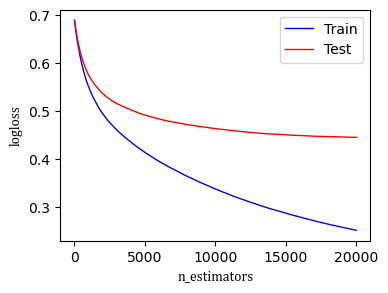

In [43]:
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train', color='blue', linewidth = '1')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test', color='red', linewidth = '1')
ax.legend()
plt.ylabel('logloss',{'fontname':'Cambria'})
plt.xlabel('n_estimators',{'fontname':'Cambria'})
# plt.title('XGBoost logloss', {'fontname':'Cambria'})
plt.show()

In [44]:
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)
print('Log-loss: %.3f' % log_loss(y_pred, y_test))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ' , recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

[11:17:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.799
Log-loss: 7.234
precision:  0.8103448275862069
recall:  0.7286821705426356
f1_score:  0.7673469387755102
roc_auc_score:  0.7933733433358339


Test-Set Confusion Matrix

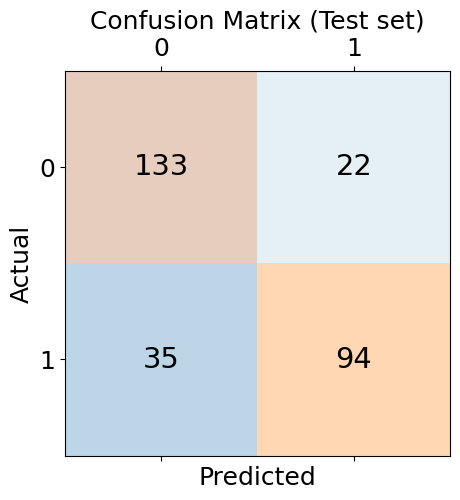

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Paired, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix (Test set)', fontsize=18)
plt.show()

In [63]:
# valsetpred = model.predict(x_val[COLUMNS_TRAINING])
# # print(valset['driver'])
# # print(valsetpred)
# score = accuracy_score(y_val, valsetpred)
# print('Accuracy: %.3f' % score)
# print('Log-loss: %.3f' % log_loss(valsetpred, y_val))
# print('precision: ', precision_score(y_val, valsetpred))
# print('recall: ' , recall_score(y_val, valsetpred))
# print('f1_score: ', f1_score(y_val, valsetpred))

Accuracy: 0.932
Log-loss: 2.469
precision:  0.9117647058823529
recall:  0.9393939393939394
f1_score:  0.9253731343283583


Validation-Set Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_val, y_pred=valsetpred)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Paired, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix (Validation set)', fontsize=18)
plt.show()

Rheinbay Confusion Matrix

Accuracy: 0.795
Log-loss: 7.382
precision:  0.7996845425867508
recall:  0.7120786516853933
f1_score:  0.7533432392273404
roc_auc_score:  0.7861823401441268


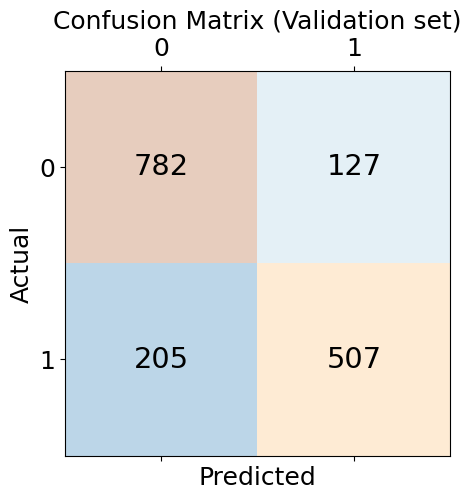

In [46]:
valsetpred = model.predict(data_test[data_test['data_source'] != 'Dr.Nod 2023'][COLUMNS_TRAINING])
valset_y = data_test[data_test['data_source'] != 'Dr.Nod 2023']['driver']
score = accuracy_score(valset_y, valsetpred)
print('Accuracy: %.3f' % score)
print('Log-loss: %.3f' % log_loss(valsetpred, valset_y))
print('precision: ', precision_score(valset_y, valsetpred))
print('recall: ' , recall_score(valset_y, valsetpred))
print('f1_score: ', f1_score(valset_y, valsetpred))
print('roc_auc_score: ', roc_auc_score(valset_y, valsetpred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=valset_y, y_pred=valsetpred)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Paired, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix (Validation set)', fontsize=18)
plt.show()

Dr.Nod Confusion Matrix

Accuracy: 0.787
Log-loss: 7.691
precision:  0.40930232558139534
recall:  0.4467005076142132
f1_score:  0.42718446601941745
roc_auc_score:  0.6534932681085367


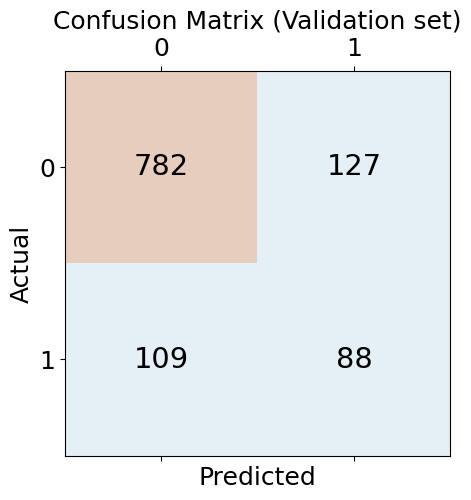

In [47]:
valsetpred = model.predict(data_test[data_test['data_source'] != 'Rheinbay et al 2020'][COLUMNS_TRAINING])
valset_y = data_test[data_test['data_source'] != 'Rheinbay et al 2020']['driver']
score = accuracy_score(valset_y, valsetpred)
print('Accuracy: %.3f' % score)
print('Log-loss: %.3f' % log_loss(valsetpred, valset_y))
print('precision: ', precision_score(valset_y, valsetpred))
print('recall: ' , recall_score(valset_y, valsetpred))
print('f1_score: ', f1_score(valset_y, valsetpred))
print('roc_auc_score: ', roc_auc_score(valset_y, valsetpred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=valset_y, y_pred=valsetpred)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Paired, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix (Validation set)', fontsize=18)
plt.show()

In [20]:
from random import seed
from random import randrange
 
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
 output_values = [row[-1] for row in train]
 prediction = max(set(output_values), key=output_values.count)
 predicted = [prediction for i in range(len(test))]
 return predicted

train = x_train
train['driver'] = y_train
test = x_test
test['driver'] = y_test
seed(1)
# train = [['0'], ['0'], ['0'], ['0'], ['1'], ['1']]
# test = [[None], [None], [None], [None]]
predictions = zero_rule_algorithm_classification(train, test)
print(predictions)

['t', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',

In [ ]:
valset = data_test.copy()
valset['driver'] = data_test['driver']
valset['predicted'] = valsetpred
valset['result'] = np.where(valset['driver'] == valset['predicted'], 'correct', 'wrong')
valset[['result', 'data_source']].value_counts()

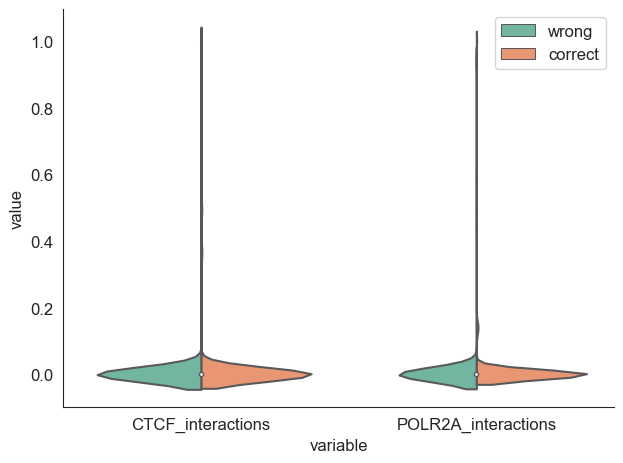

In [44]:
meltdf = valset[['CTCF_interactions', 'POLR2A_interactions', 'driver', 'result']].melt(id_vars=['result'], value_vars=['CTCF_interactions', 'POLR2A_interactions'])
sns.set_style('white')
ax = sns.violinplot(data=meltdf, x='variable', y='value', hue='result', split=True, palette='Set2')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

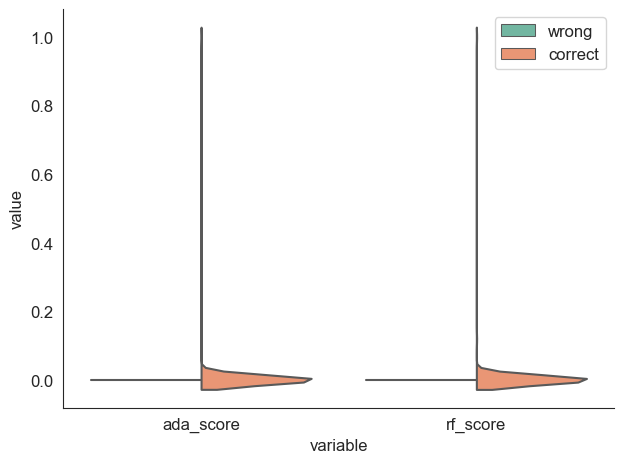

In [45]:
meltdf = valset[['ada_score', 'rf_score', 'driver', 'result']].melt(id_vars=['result'], value_vars=['ada_score', 'rf_score'])
sns.set_style('white')
ax = sns.violinplot(data=meltdf, x='variable', y='value', hue='result', split=True, palette='Set2')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

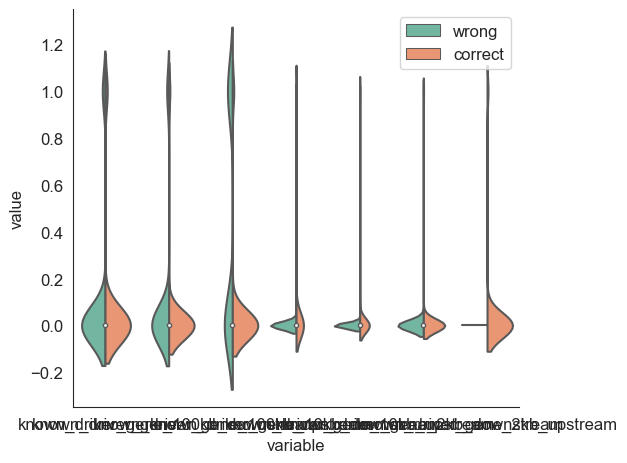

In [49]:
meltdf = valset[['known_driver_gene', 'known_driver_gene_100kb_downstream', 'known_driver_gene_100kb_upstream', 'known_driver_gene_10kb_downstream','known_driver_gene_10kb_upstream', 'known_driver_gene_2kb_downstream', 'known_driver_gene_2kb_upstream', 'driver', 'result']].melt(id_vars=['result'], value_vars=['known_driver_gene', 'known_driver_gene_100kb_downstream', 'known_driver_gene_100kb_upstream', 'known_driver_gene_10kb_downstream','known_driver_gene_10kb_upstream', 'known_driver_gene_2kb_downstream', 'known_driver_gene_2kb_upstream',])
sns.set_style('white')
ax = sns.violinplot(data=meltdf, x='variable', y='value', hue='result', split=True, palette='Set2')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

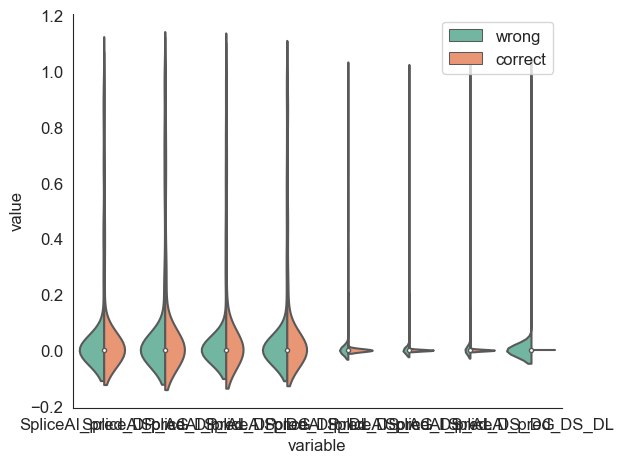

In [50]:
meltdf = valset[['SpliceAI_pred_DP_AG', 'SpliceAI_pred_DP_AL',
                    'SpliceAI_pred_DP_DG', 'SpliceAI_pred_DP_DL', 'SpliceAI_pred_DS_AG',
                    'SpliceAI_pred_DS_AL', 'SpliceAI_pred_DS_DG', 'SpliceAI_pred_DS_DL', 'driver', 'result']].melt(id_vars=['result'], value_vars=['SpliceAI_pred_DP_AG', 'SpliceAI_pred_DP_AL',
                    'SpliceAI_pred_DP_DG', 'SpliceAI_pred_DP_DL', 'SpliceAI_pred_DS_AG',
                    'SpliceAI_pred_DS_AL', 'SpliceAI_pred_DS_DG', 'SpliceAI_pred_DS_DL'])
sns.set_style('white')
ax = sns.violinplot(data=meltdf, x='variable', y='value', hue='result', split=True, palette='Set2')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

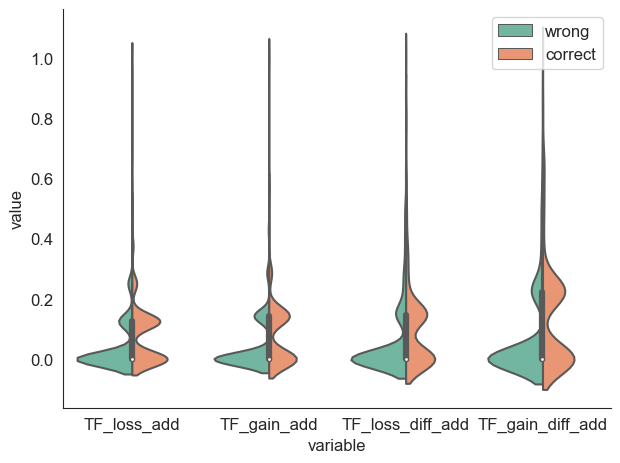

In [67]:
meltdf = valset[['TF_loss_add', 'TF_gain_add', 'TF_loss_diff_add', 'TF_gain_diff_add', 'driver', 'result']].melt(id_vars=['result'], value_vars=['TF_loss_add', 'TF_gain_add', 'TF_loss_diff_add', 'TF_gain_diff_add',])
sns.set_style('white')
ax = sns.violinplot(data=meltdf, x='variable', y='value', hue='result', split=True, palette='Set2')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

SHAP Explainer

In [48]:
x_data = data[COLUMNS_TRAINING]
x_data = x_data.reindex(columns=COLUMNS_TRAINING)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_data)

In [49]:
for c in COLUMNS_SHAP:
    data[c] = np.nan
data.loc[data.index, COLUMNS_SHAP] = shap_values

In [21]:
# x_data[['splice_acceptor_variant', 'splice_donor_variant', 'promoter', 'downstream_gene_variant', 'regulatory_region_variant']]#.describe()
x_data.columns.get_loc('downstream_gene_variant')
# x_data.columns.get_loc('TF_loss_add')
# x_data.columns.get_loc('LOEUF')
# data['driver'].value_counts()

17

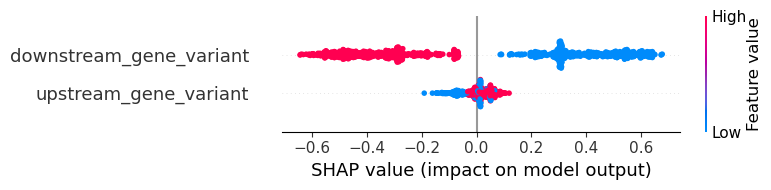

In [22]:
# shap.summary_plot(shap_values[:,2:5], x_data.iloc[:, 2:5], plot_size = 0.25)  # protein product
# shap.summary_plot(shap_values[:,6:14], x_data.iloc[:, 6:14], plot_size = 0.25)  # splice ai
# shap.summary_plot(shap_values[:,0:2], x_data.iloc[:, 0:2], plot_size = 0.25) #ada score rf score
# shap.summary_plot(shap_values[:,39:43], x_data.iloc[:, 39:43], plot_size = 0.25)  # interactions
# shap.summary_plot(shap_values[:,[48, 50, 51, 52, 53, 54, 49]], x_data.iloc[:, [48, 50, 51, 52, 53, 54, 49]], plot_size = 0.25) # cosmic genes
# shap.summary_plot(shap_values[:,43:48], x_data.iloc[:, 43:48], plot_size = 0.25) #repeat masker
# shap.summary_plot(shap_values[:,65:70], x_data.iloc[:, 65:70], plot_size = 0.25)  # tf
# shap.summary_plot(shap_values[:,5:6], x_data.iloc[:, 5:6], plot_size = 0.25)  # loeuf
# shap.summary_plot(shap_values[:,[60, 55, 24, 38, 17, 23]], x_data.iloc[:, [60, 55, 24, 38, 17, 23]], plot_size = 0.25) # the rest
shap.summary_plot(shap_values[:,[17, 25]], x_data.iloc[:, [17, 25]], plot_size = 0.25) # the rest

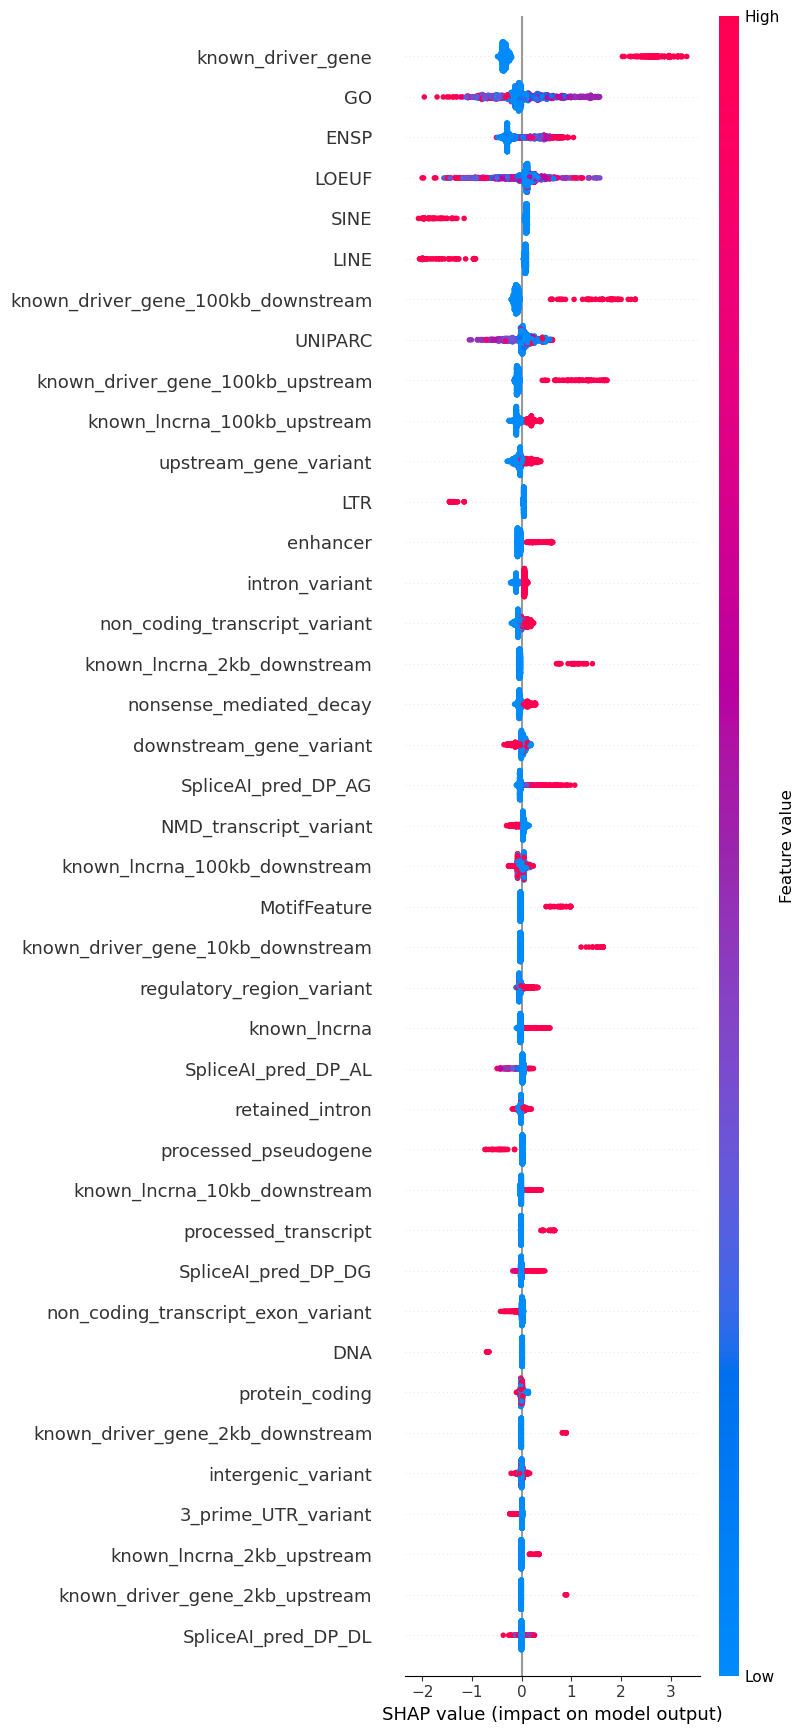

In [50]:
shap.summary_plot(shap_values, x_data, max_display=40)

In [ ]:
# shap.dependence_plot("CTCF_interactions", shap_values, x_data, interaction_index="CTCF_chains")
shap.plots.violin(shap_values, feature_names=list(data[COLUMNS_TRAINING].columns), plot_type="violin")

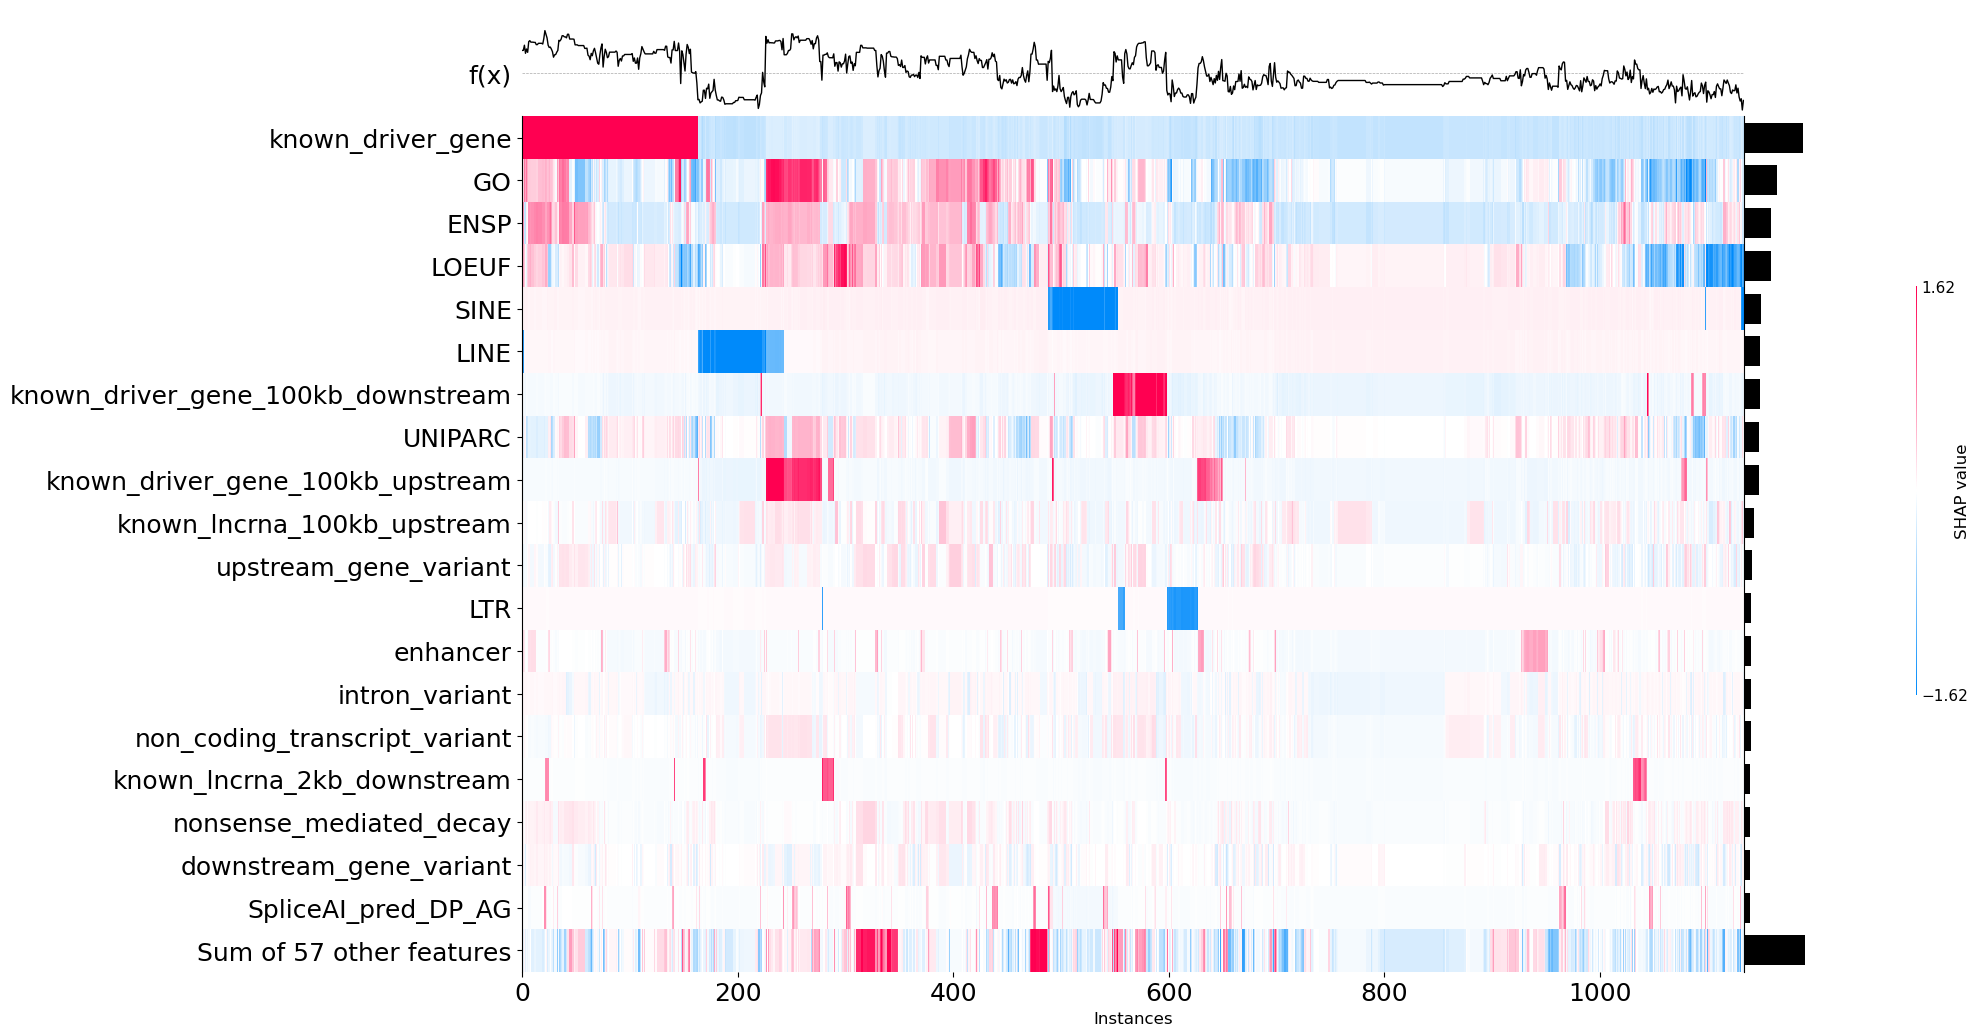

In [51]:
# shap.plots.heatmap(shap_values)
plt.rcParams.update({'font.size': 12})
shap_values_explaination = shap.Explanation(shap_values, feature_names=data[COLUMNS_TRAINING].columns.tolist()) 
shap.plots.heatmap(shap_values_explaination, max_display=20, plot_width=18, show=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [68]:
x_data = data[COLUMNS_TRAINING]
explainer = shap.TreeExplainer(model) # grabbing the first model
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[101:200], x_data[101:200])

<Axes: >

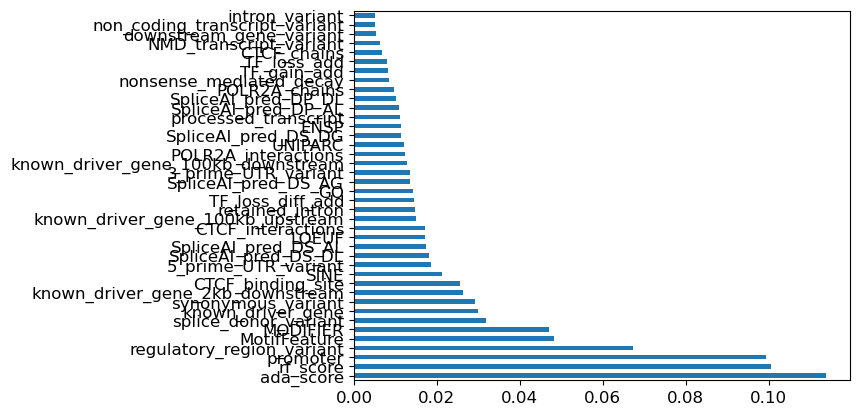

In [80]:
feat_importances = pd.Series(model.feature_importances_, index=data[COLUMNS_TRAINING].columns)
feat_importances.nlargest(40).plot(kind='barh')

SHAP for Validation Set

In [122]:
x_data_test = data_test[COLUMNS_TRAINING]
x_data_test = x_data_test.reindex(columns=COLUMNS_TRAINING)

explainer_test = shap.TreeExplainer(model)
shap_values_test = explainer_test.shap_values(x_data_test)

for c in COLUMNS_SHAP:
    data_test[c] = np.nan
data_test.loc[data_test.index, COLUMNS_SHAP] = shap_values_test

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


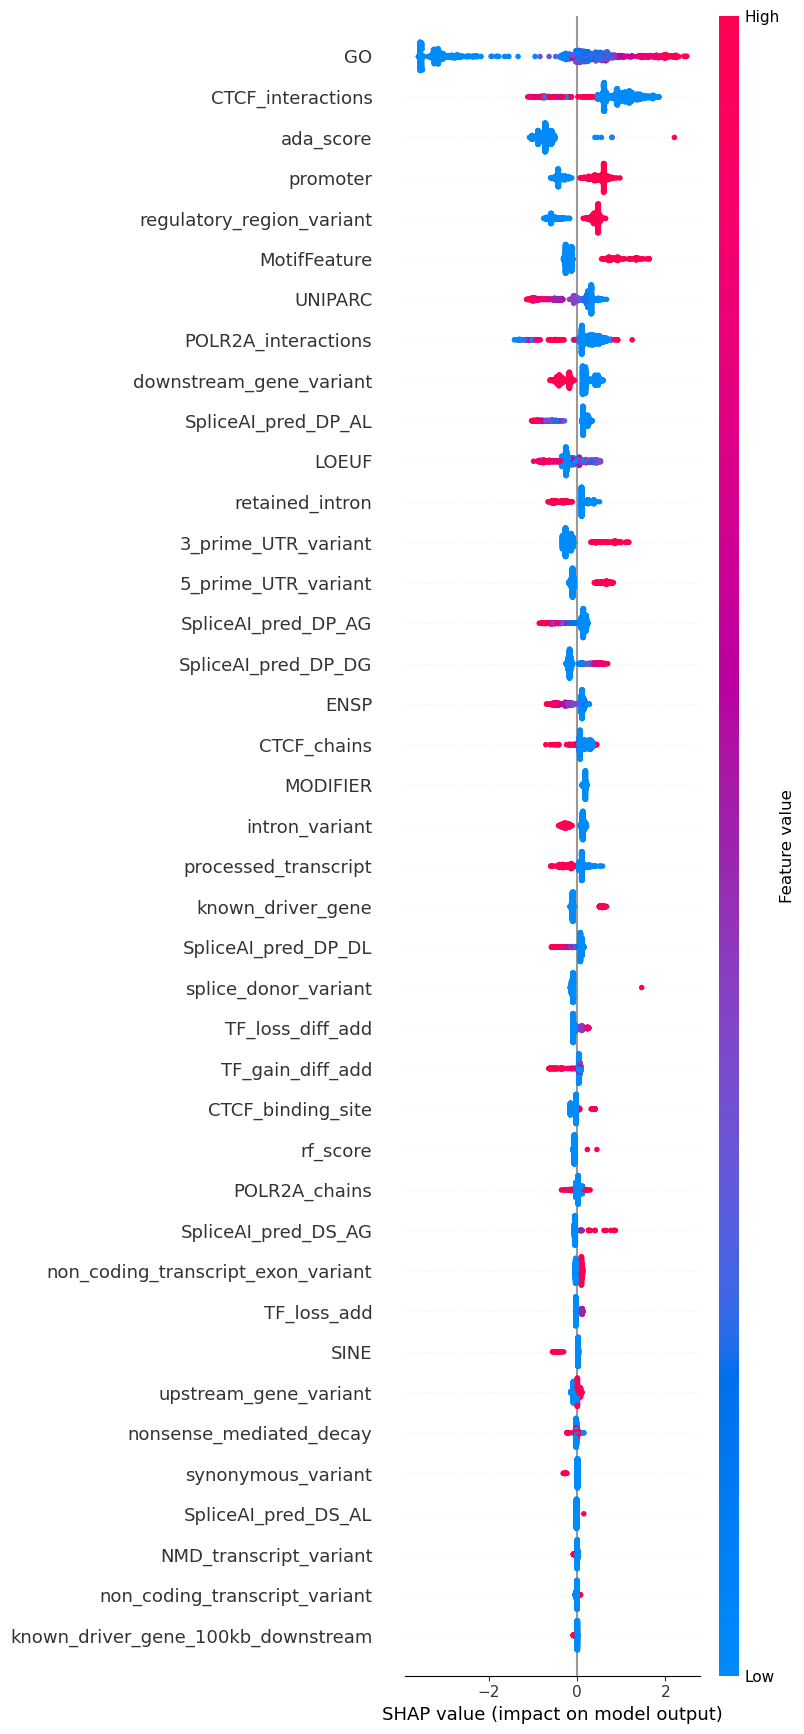

In [123]:
shap.summary_plot(shap_values_test, x_data_test, max_display=40)

In [83]:
data[data['driver'] == 0][['CTCF_interactions']].count()

CTCF_interactions    487
dtype: int64

In [66]:
data[data['driver'] == 1][['CTCF_interactions']].count()

CTCF_interactions    487
dtype: int64

In [5]:
data_test[['data_source']].value_counts()

data_source        
Rheinbay et al 2020    820
Dr.Nod 2023            197
COSMIC                 112
dtype: int64

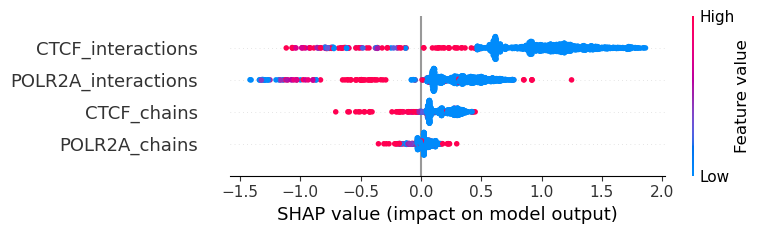

In [124]:
# shap.summary_plot(shap_values_test[:,2:5], x_data_test.iloc[:, 2:5], plot_size = 0.25)  # protein product
# shap.summary_plot(shap_values_test[:,6:14], x_data_test.iloc[:, 6:14], plot_size = 0.25)  # splice ai
# shap.summary_plot(shap_values_test[:,0:2], x_data_test.iloc[:, 0:2], plot_size = 0.25) #ada score rf score
shap.summary_plot(shap_values_test[:,39:43], x_data_test.iloc[:, 39:43], plot_size = 0.25)  # interactions
# shap.summary_plot(shap_values_test[:,[48, 50, 51, 52, 53, 54, 49]], x_data_test.iloc[:, [48, 50, 51, 52, 53, 54, 49]], plot_size = 0.25) # cosmic genes
# shap.summary_plot(shap_values_test[:,43:48], x_data_test.iloc[:, 43:48], plot_size = 0.25) #repeat masker
# shap.summary_plot(shap_values_test[:,65:70], x_data_test.iloc[:, 65:70], plot_size = 0.25)  # tf
# shap.summary_plot(shap_values_test[:,5:6], x_data_test.iloc[:, 5:6], plot_size = 0.25)  # loeuf
# shap.summary_plot(shap_values_test[:,[60, 24, 38, 17, 23]], x_data_test.iloc[:, [60, 24, 38, 17, 23]], plot_size = 0.25) # the rest

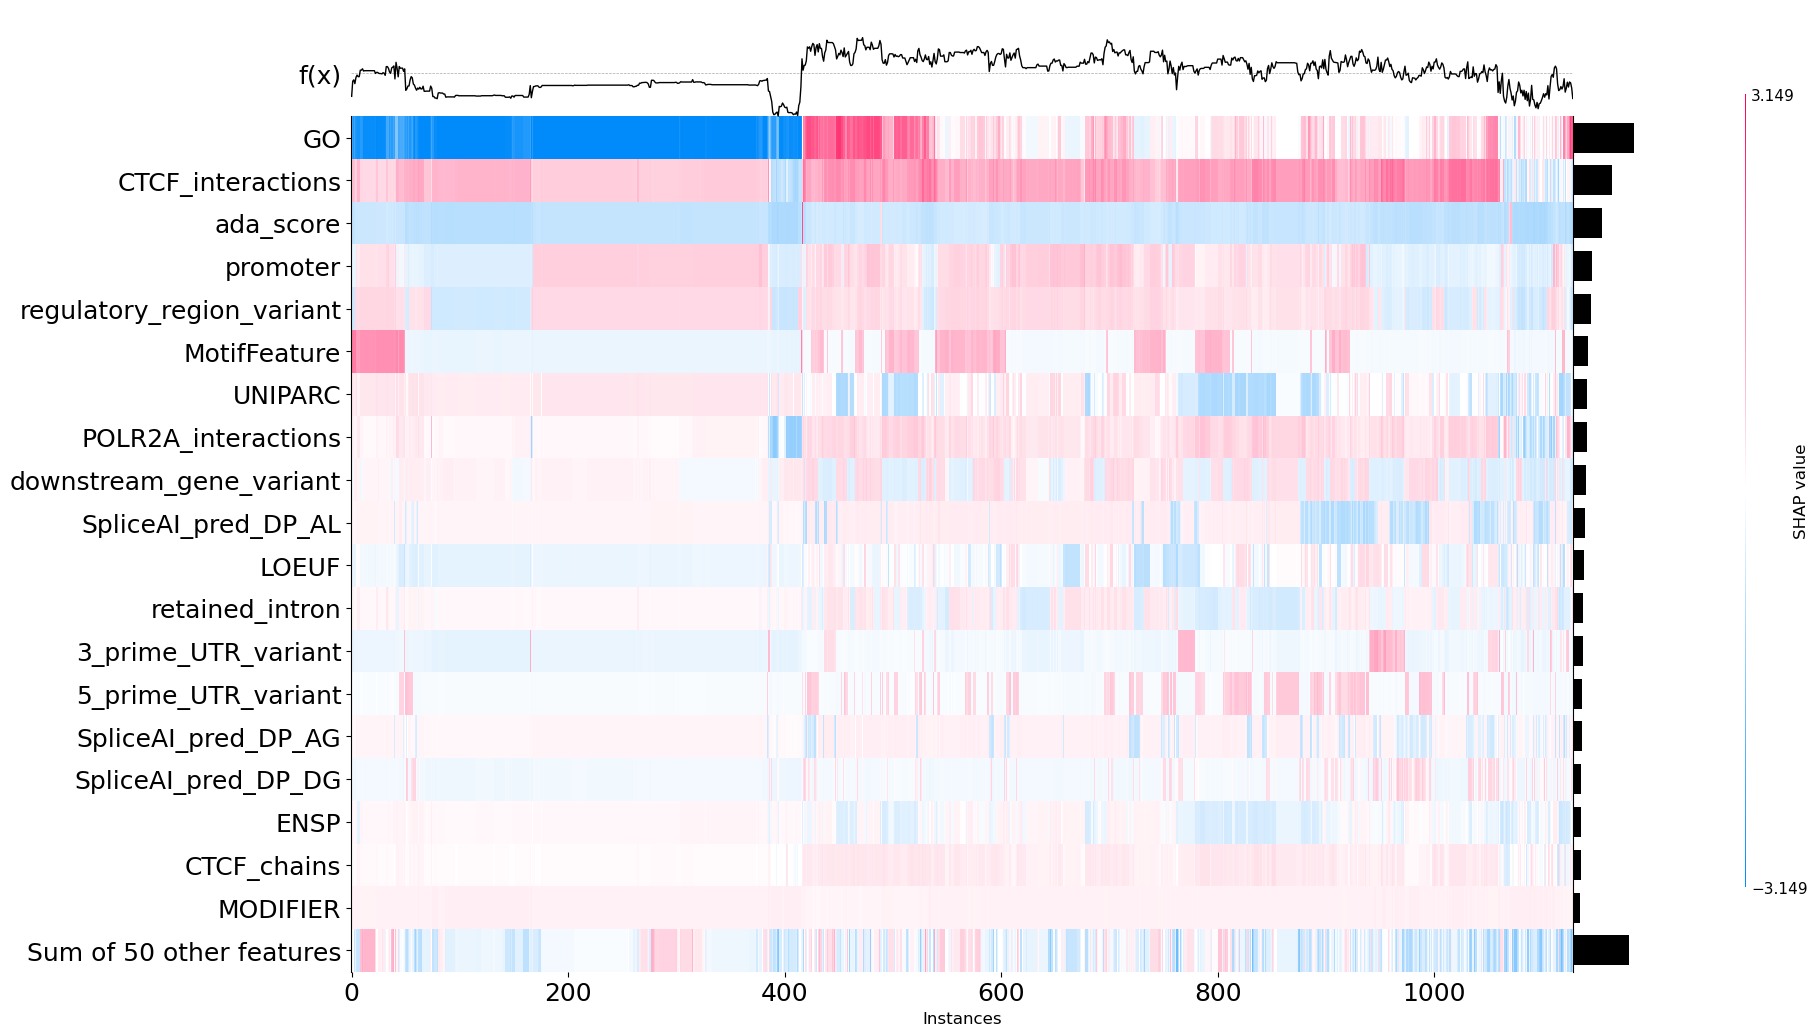

In [125]:
# shap.plots.heatmap(shap_values)
plt.rcParams.update({'font.size': 12})
shap_values_explaination_test = shap.Explanation(shap_values_test, feature_names=data_test[COLUMNS_TRAINING].columns.tolist()) 
shap.plots.heatmap(shap_values_explaination_test, max_display=20, plot_width=18, show=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [126]:
data['driver'].value_counts()

0    487
1    487
Name: driver, dtype: int64

In [127]:
len(data)

974